In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time
sns.set_style('darkgrid')
from scipy import stats

In [37]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Define column names
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

df = pd.read_csv(url, header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Eksik değerleri kontrol edelim.

In [38]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Veri setimizi eğitim ve test kümelerine ayıralım

In [115]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values.flatten()


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [117]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (354, 13)
Shape of X_test:  (152, 13)
Shape of y_train:  (354,)
Shape of y_test (152,)


Veriyi normalleştirelim. Bunun için Min-Max normalleştirme yönteminden yararlanacağız.

In [118]:
# Min-Max normalleştirme
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

print("Min-Max Normalized Data:")
print(df_minmax)


Min-Max Normalized Data:
[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 4.22222222e-01]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 3.68888889e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.89737254e-01
  6.34657837e-02 6.60000000e-01]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 4.20000000e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.91300620e-01
  1.31070640e-01 3.77777778e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 1.53333333e-01]]


In [119]:
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

Gradyan iniş algoritması ile lineer regresyon modeli oluşturacağız. Kullanacağımız fonksiyonlar:
1.Cost Fonksiyonu
2.Gradient Fonksiyonu (Gradyan Fonksiyonu)
3.Hypothesis Fonksiyonu (Hipotez Fonksiyonu)
4.Gradient_descent (Gradyan İniş Fonksiyonu)

In [120]:
X.shape, y.shape

((506, 13), (506,))

In [121]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(506, 14)


In [122]:
print(X[3])

[1.0000e+00 3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01
 6.9980e+00 4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01
 3.9463e+02 2.9400e+00]


In [125]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(X, theta) - y) ** 2)


def gradient(X, y, theta):
    m = len(y)
    return (1/m) * np.dot(X.T, (hypothesis(X, theta) - y))
def hypothesis(X, theta):
    return np.dot(X, theta)

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    theta = np.zeros(X.shape[1])
    cost_history = []

    for epoch in range(epochs):
        theta -= learning_rate * gradient(X, y, theta)
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

In [126]:
start_time = time.time()
theta, cost_history = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)
end_time = time.time()

print("Time taken: ", end_time - start_time)


Time taken:  0.033606767654418945


In [127]:
print(theta)

[10.20034655 -1.31139039  4.94428388 -1.54031514  1.79146116 -0.62439466
 11.53564618  1.77313879  2.79613134 -1.18391733 -2.13578285 -1.51936877
  9.62814966 -5.41519225]


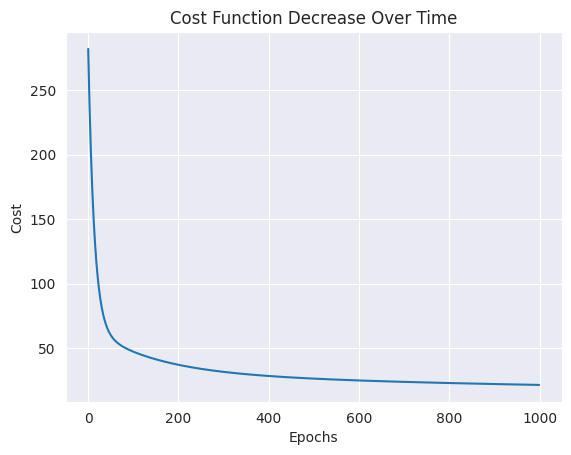

In [128]:
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Decrease Over Time')
plt.show()

Eğitim ve est kümelerine ayırmıştık. Bu kümeler üzerinden tahminleri belirleyip bu değerler ile gerçekleri karşılaştırıp bir performans değerlendirmesi yapmış olacağız.

In [129]:
theta, _ = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)

In [130]:
train_predictions = hypothesis(X_train, theta)
train_mse = mean_squared_error(y_train, train_predictions)
print("Training Mean Squared Error:", train_mse)

Training Mean Squared Error: 42.92174772535645


In [131]:
test_predictions = hypothesis(X_test, theta)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test Mean Squared Error:", test_mse)

Test Mean Squared Error: 38.1031356882064


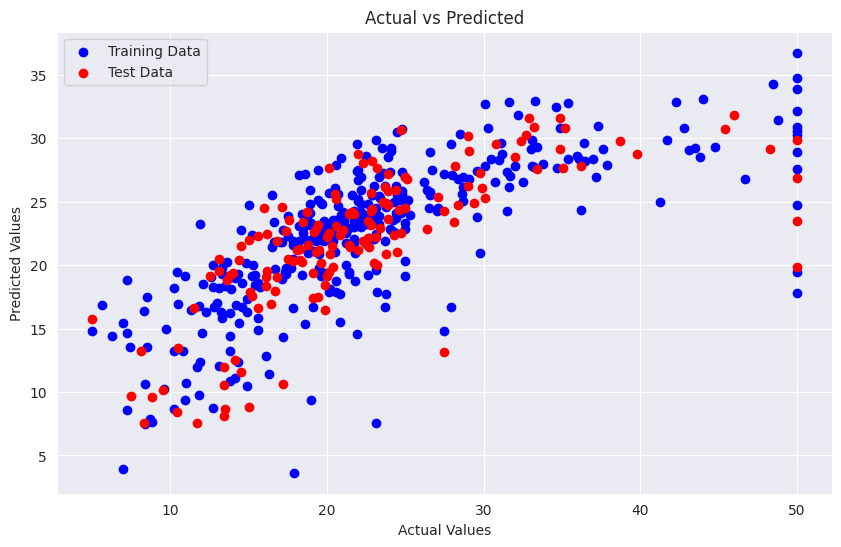

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Training Data')

plt.scatter(y_test, test_predictions, color='red', label='Test Data')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Görselleştirmeyi yapalım.


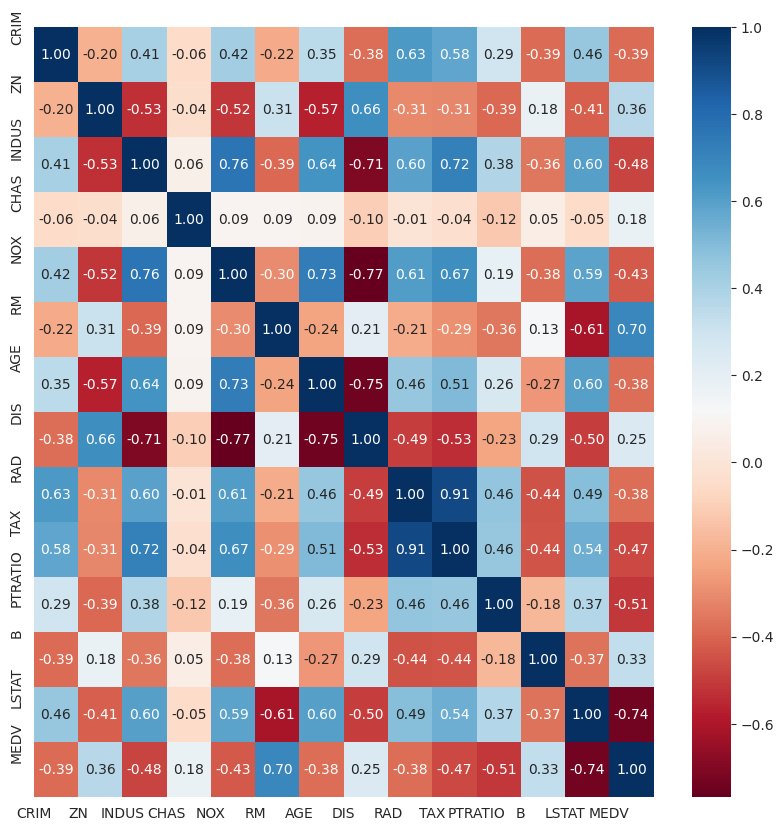

In [135]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns);

plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

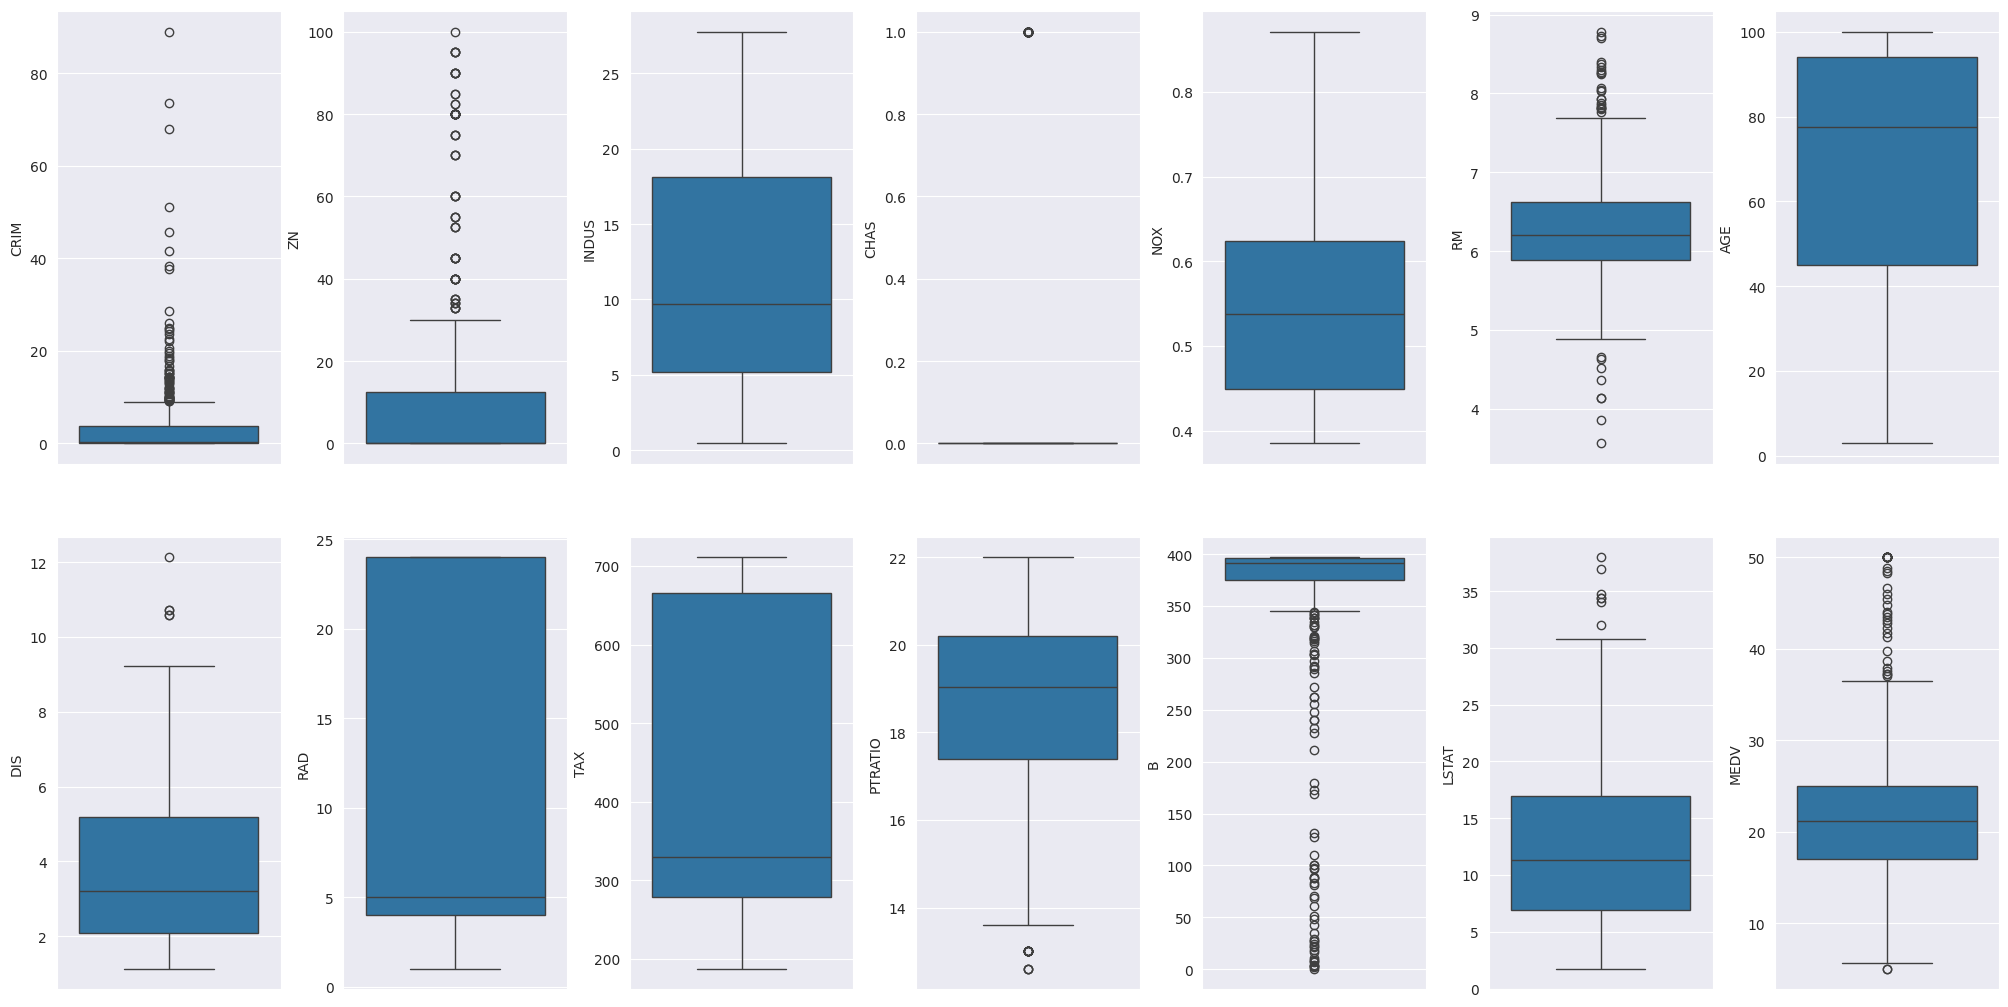

In [144]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()
